In [154]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import subprocess
import time
import hashlib
import math

In [262]:
c_int_mx_pos = pow(2,31) # max positive signed 32-bit int
# 2's complement arithmetic, so there is one extra negative inta
c_int_mn_neg = -1*c_int_mx_pos - 1 
num_ints = 10*1000*1000 # 10 million integers for testing

In [263]:
# grab 10 million uniformly distributred random 32-bit ints
# note that the "high" argument is exclusive, hence the "+1"
ten_million_rand_ints = np.random.randint(low=c_int_mn_neg,
                                          high=c_int_mx_pos +1,
                                          size=num_ints)

tn_rand_ints_str = ' '.join(map(str, ten_million_rand_ints))

In [264]:
def sha256(input):  
    # for quickly checking equality of strings (or files)
    return (hashlib.sha256(input.encode('raw_unicode_escape')).digest())[1:].decode('raw_unicode_escape')

In [265]:
def get_output(binary_name, input_str):
    start_time = time.time()
    # this passes the input_str the stdin for the binary
    oput = (subprocess.check_output([binary_name],
                                    input=bytes(input_str.encode('utf-8')))).decode('utf-8')
    end_time = time.time()
    return (end_time - start_time, oput)
    


In [266]:
def run_test(binary_name, start_size, end_size, int_samples, inc=1):
    exec_times = [get_output(binary_name, int_samples[0: start_size + j*inc])[0] 
                     for j in range(math.floor((end_size - start_size)/inc))]
    return exec_times
    

In [267]:
# The binary names
# The first two are solutions using only my data structures
# The second 2 use a simple STL solution using a vector
min_max_heap = './median_stream_stdin1'
my_sorted_array = './median_stream_stdin2'
stl_sorted_vector = './median_stream_stdin3'
stl_sorted_vector_reserve = './median_stream_stdin4'

In [ ]:
#(exec_time, oput1) = get_output(min_max_heap, tn_rand_ints_str)
end_sz = 10*1000*1000 - 1
start_sz = 1
inc = 10000
exec_times1 = run_test(min_max_heap, start_size=start_sz, end_size=end_sz, int_samples=tn_rand_ints_str, inc=inc )
exec_times2 = run_test(my_sorted_array,start_size=start_sz, end_size=end_sz,int_samples=tn_rand_ints_str,inc=inc)

In [ ]:
exec_times3 = run_test(stl_sorted_vector,start_size=start_sz,end_size=end_sz,int_samples=tn_rand_ints_str,inc=inc)

In [ ]:
exec_times4 = run_test(stl_sorted_vector_reserve,start_size=start_sz,end_size=end_sz,int_samples=tn_rand_ints_str,inc=inc)

In [ ]:

x = [start_sz + j*inc for j in range(math.floor((end_sz-start_sz)/inc))]

In [ ]:
x_squared = [k*k/100000000000.0 for k in x]
x_logx = [k*math.log(k)/10000000.0 for k in x]

In [ ]:
sns.plt.plot(x, exec_times1, 'b')
sns.plt.plot(x, exec_times2)
sns.plt.plot(x, exec_times3, 'r--')
sns.plt.plot(x, exec_times4, 'g*')

sns.set(palette='dark')
    
#plt.show()
#plt.plot(x, x_squared)
#plt.plot(x, x_logx)

In [232]:
cur_time = time.time()
time.sleep(5)
cur_time2 = time.time()

print(cur_time)
print(cur_time2)

1459086983.436315
1459086988.438736


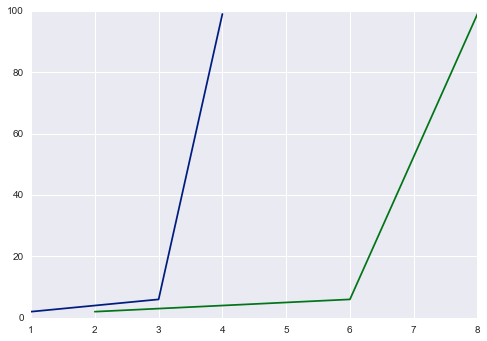

In [96]:
x = (1,2,3,4)
y = (2,4,6,99)
#print(sns.palettes.SEABORN_PALETTES)
sns.set(palette='dark')
sns.plt.plot(x,y)
sns.plt.plot([2*j for j in x], y)